In [85]:
import pandas as pd

In [86]:
from matplotlib import pyplot as plt

In [87]:
ar = pd.read_csv("ARCHAEOGLOBE_CONSENSUS_ASSESSMENT.csv", engine='python') # I was getting a UnicodeDecodeError, so I looked online for a solution, and engine='python' seems to work

In [88]:
ar.head()

,Region,Label,FHG_10KBP,FHG_8KBP,FHG_6KBP,FHG_4KBP,FHG_3KBP,FHG_2KBP,FHG_1KBP,FHG_1500CE,...,URBAN_10kbp,URBAN_8kbp,URBAN_6kbp,URBAN_4kbp,URBAN_3kbp,URBAN_2kbp,URBAN_1kbp,URBAN_1500CE,URBAN_1750CE,URBAN_1850CE
0,1,Alaska,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,...,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Split
1,2,Yukon Territory,Widespread,Common,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,...,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Present
2,3,Northwest Territories,None,None,None,Minimal,Common,Common,Common,Common,...,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent
3,4,Nunavut,None,Common,Common,Common,Common,Common,Widespread,Widespread,...,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent
4,5,British Columbia,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,Widespread,...,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Present


In [89]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        146 non-null    int64 
 1   Label         146 non-null    object
 2   FHG_10KBP     146 non-null    object
 3   FHG_8KBP      146 non-null    object
 4   FHG_6KBP      146 non-null    object
 5   FHG_4KBP      146 non-null    object
 6   FHG_3KBP      146 non-null    object
 7   FHG_2KBP      146 non-null    object
 8   FHG_1KBP      146 non-null    object
 9   FHG_1500CE    146 non-null    object
 10  FHG_1750CE    146 non-null    object
 11  FHG_1850CE    146 non-null    object
 12  EXAGR_10KBP   146 non-null    object
 13  EXAGR_8KBP    146 non-null    object
 14  EXAGR_6KBP    146 non-null    object
 15  EXAGR_4KBP    146 non-null    object
 16  EXAGR_3KBP    146 non-null    object
 17  EXAG_2KBP     146 non-null    object
 18  EXAG_1KBP     146 non-null    object
 19  EXAG_150

In [90]:
# ok, first thing - the data is not structured as I would like
# Currently the landuse and timeslice are together as headings, but I want these to be separate columns
# I also want a column called prevalence level - which is currently the entry in every row
# so let's do some conversion, we're going from wide to long format using melt (https://stackoverflow.com/questions/47790226/transform-dataframe-column-headers-to-row-entries-in-python)

In [91]:
ar.columns[2:]

Index(['FHG_10KBP', 'FHG_8KBP', 'FHG_6KBP', 'FHG_4KBP', 'FHG_3KBP', 'FHG_2KBP',
       'FHG_1KBP', 'FHG_1500CE', 'FHG_1750CE', 'FHG_1850CE', 'EXAGR_10KBP',
       'EXAGR_8KBP', 'EXAGR_6KBP', 'EXAGR_4KBP', 'EXAGR_3KBP', 'EXAG_2KBP',
       'EXAG_1KBP', 'EXAG_1500CE', 'EXAG_1750CE', 'EXAG_1850CE', 'INAG_10KBP',
       'INAG_8KBP', 'INAG_6KBP', 'INAG_4KBP', 'INAG_3KBP', 'INAG_2KBP',
       'INAG_1KBP', 'INAG_1500CE', 'INAG_1750CE', 'INAG_1850CE', 'PAS_10KBP',
       'PAS_8KBP', 'PAS_6KBP', 'PAS_4KBP', 'PAS_3KBP', 'PAS_2KBP', 'PAS_1KBP',
       'PAS_1500CE', 'PAS_1750CE', 'PAS_1850CE', 'URBAN_10kbp', 'URBAN_8kbp',
       'URBAN_6kbp', 'URBAN_4kbp', 'URBAN_3kbp', 'URBAN_2kbp', 'URBAN_1kbp',
       'URBAN_1500CE', 'URBAN_1750CE', 'URBAN_1850CE'],
      dtype='object')

In [92]:
ar2 = ar.melt(id_vars=['Region', 'Label'], value_vars=['FHG_10KBP', 'FHG_8KBP', 'FHG_6KBP', 'FHG_4KBP', 'FHG_3KBP',
       'FHG_2KBP', 'FHG_1KBP', 'FHG_1500CE', 'FHG_1750CE', 'FHG_1850CE',
       'EXAGR_10KBP', 'EXAGR_8KBP', 'EXAGR_6KBP', 'EXAGR_4KBP', 'EXAGR_3KBP',
       'EXAG_2KBP', 'EXAG_1KBP', 'EXAG_1500CE', 'EXAG_1750CE', 'EXAG_1850CE',
       'INAG_10KBP', 'INAG_8KBP', 'INAG_6KBP', 'INAG_4KBP', 'INAG_3KBP',
       'INAG_2KBP', 'INAG_1KBP', 'INAG_1500CE', 'INAG_1750CE', 'INAG_1850CE',
       'PAS_10KBP', 'PAS_8KBP', 'PAS_6KBP', 'PAS_4KBP', 'PAS_3KBP', 'PAS_2KBP',
       'PAS_1KBP', 'PAS_1500CE', 'PAS_1750CE', 'PAS_1850CE', 'URBAN_10kbp',
       'URBAN_8kbp', 'URBAN_6kbp', 'URBAN_4kbp', 'URBAN_3kbp', 'URBAN_2kbp',
       'URBAN_1kbp', 'URBAN_1500CE', 'URBAN_1750CE', 'URBAN_1850CE'])

In [93]:
ar2

,Region,Label,variable,value
0,1,Alaska,FHG_10KBP,Widespread
1,2,Yukon Territory,FHG_10KBP,Widespread
2,3,Northwest Territories,FHG_10KBP,None
3,4,Nunavut,FHG_10KBP,None
4,5,British Columbia,FHG_10KBP,Widespread
...,...,...,...,...
7295,142,Melanesia,URBAN_1850CE,Present
7296,143,New Zealand,URBAN_1850CE,Present
7297,144,Micronesia,URBAN_1850CE,Absent
7298,145,Polynesia,URBAN_1850CE,Present


In [94]:
# Now, let's create a new column and put our timeslice in it from the 'variable' column

In [95]:
ar2['timeslice'] = ar2['variable'].apply(lambda x: x.split('_')[1])

In [96]:
ar2.head()

,Region,Label,variable,value,timeslice
0,1,Alaska,FHG_10KBP,Widespread,10KBP
1,2,Yukon Territory,FHG_10KBP,Widespread,10KBP
2,3,Northwest Territories,FHG_10KBP,None,10KBP
3,4,Nunavut,FHG_10KBP,None,10KBP
4,5,British Columbia,FHG_10KBP,Widespread,10KBP


In [97]:
# and let's get rid of the time in the landuse column

In [98]:
ar2['variable'] = ar2['variable'].apply(lambda x: x.split('_')[0])

In [99]:
ar2.head()

,Region,Label,variable,value,timeslice
0,1,Alaska,FHG,Widespread,10KBP
1,2,Yukon Territory,FHG,Widespread,10KBP
2,3,Northwest Territories,FHG,None,10KBP
3,4,Nunavut,FHG,None,10KBP
4,5,British Columbia,FHG,Widespread,10KBP


In [100]:
# perfect, now let's rename the columns
ar2.columns = ('region', 'name', 'landuse', 'prevalence', 'timeslice')

In [101]:
ar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      7300 non-null   int64 
 1   name        7300 non-null   object
 2   landuse     7300 non-null   object
 3   prevalence  7300 non-null   object
 4   timeslice   7300 non-null   object
dtypes: int64(1), object(4)
memory usage: 285.3+ KB


In [102]:
ar2.head()

,region,name,landuse,prevalence,timeslice
0,1,Alaska,FHG,Widespread,10KBP
1,2,Yukon Territory,FHG,Widespread,10KBP
2,3,Northwest Territories,FHG,None,10KBP
3,4,Nunavut,FHG,None,10KBP
4,5,British Columbia,FHG,Widespread,10KBP


In [103]:
# Ok, we're almost ready to start analyzing this dataset
# many of the analyses we're going to do, will involve examining trends over time
# so let's change the timslice values to numbers representing years before present
# we'll do this by creating a dictionary and replacing the values according to their keys

In [104]:
ar2['timeslice'].unique()

array(['10KBP', '8KBP', '6KBP', '4KBP', '3KBP', '2KBP', '1KBP', '1500CE',
       '1750CE', '1850CE', '10kbp', '8kbp', '6kbp', '4kbp', '3kbp',
       '2kbp', '1kbp'], dtype=object)

In [105]:
timenumber = {'10KBP':-10000, '8KBP':-8000, '6KBP':-6000, '4KBP':-4000, '3KBP':-3000, '2KBP':-2000, '1KBP':-1000, '1500CE':-500,
       '1750CE':-250, '1850CE':-150, '10kbp':-10000, '8kbp':-8000, '6kbp':-6000, '4kbp':-4000, '3kbp':-3000,
       '2kbp':-2000, '1kbp':-1000}

In [106]:
ar2['timeslice'].replace(timenumber, inplace=True)

In [107]:
ar2.head()

,region,name,landuse,prevalence,timeslice
0,1,Alaska,FHG,Widespread,-10000
1,2,Yukon Territory,FHG,Widespread,-10000
2,3,Northwest Territories,FHG,None,-10000
3,4,Nunavut,FHG,None,-10000
4,5,British Columbia,FHG,Widespread,-10000


In [108]:
ar2['timeslice'].unique()

array([-10000,  -8000,  -6000,  -4000,  -3000,  -2000,  -1000,   -500,
         -250,   -150], dtype=int64)

In [109]:
# ok, now we're ready to start some analyses

In [110]:
ar2['landuse'].unique()

array(['FHG', 'EXAGR', 'EXAG', 'INAG', 'PAS', 'URBAN'], dtype=object)

In [138]:
# ah, some more cleaning is still needed - 'EXAGR' should be just 'EXAG', so let's replace it

In [135]:
ar2['landuse'].replace({'EXAGR':'EXAG'}, inplace=True)

In [136]:
ar2['landuse'].unique()

array(['FHG', 'EXAG', 'INAG', 'PAS', 'URBAN'], dtype=object)

In [139]:
ar2['prevalence'].unique()

array(['Widespread', 'None', 'Common', 'Minimal', 'Absent', 'Split',
       'Present'], dtype=object)

In [140]:
# let's start with a simple chart of the presence of urban centers over time

In [141]:
mask1 = ar2['prevalence'] == 'Present'
mask2 = ar2['landuse'] == 'URBAN'
urban_presence = ar2[mask1 & mask2]

In [142]:
urb = urban_presence.groupby('timeslice').count()

In [143]:
urb

,region,name,landuse,prevalence
timeslice,,,,
-6000,5,5,5,5
-4000,20,20,20,20
-3000,27,27,27,27
-2000,57,57,57,57
-1000,91,91,91,91
-500,103,103,103,103
-250,110,110,110,110
-150,129,129,129,129


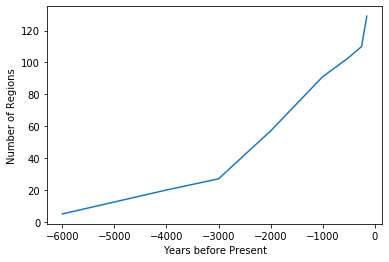

In [146]:
plt.plot(urb.index, urb['region'], label='Urban Centers Present')
plt.xlabel('Years before Present')
plt.ylabel('Number of Regions')
plt.show()

In [150]:
# nice, now let's do the same for the other landuse categories, 
# except we'll plot how many regions were 'common' or 'widespread' for each

In [151]:
mask3 = ar2['prevalence'] == 'Common'
mask4 = ar2['prevalence'] == 'Widespread'
mask5 = ar2['landuse'] == 'FHG'
mask6 = ar2['landuse'] == 'EXAG'
mask7 = ar2['landuse'] == 'INAG'
mask8 = ar2['landuse'] == 'PAS'
foraging = ar2[(mask3 | mask4) & mask5].groupby('timeslice').count()
extensive_agriculture = ar2[(mask3 | mask4) & mask6].groupby('timeslice').count()
intensive_agriculture = ar2[(mask3 | mask4) & mask7].groupby('timeslice').count()
pastoralism = ar2[(mask3 | mask4) & mask8].groupby('timeslice').count()

In [152]:
# let's check
pastoralism

,region,name,landuse,prevalence
timeslice,,,,
-10000,2,2,2,2
-8000,12,12,12,12
-6000,32,32,32,32
-4000,58,58,58,58
-3000,64,64,64,64
-2000,72,72,72,72
-1000,81,81,81,81
-500,82,82,82,82
-250,92,92,92,92


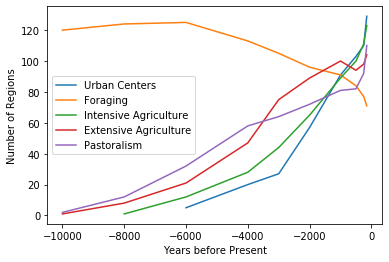

In [154]:
plt.plot(urb.index, urb['region'], label='Urban Centers')
plt.plot(foraging.index, foraging['region'], label='Foraging')
plt.plot(intensive_agriculture.index, intensive_agriculture['region'], label='Intensive Agriculture')
plt.plot(extensive_agriculture.index, extensive_agriculture['region'], label='Extensive Agriculture')
plt.plot(pastoralism.index, pastoralism['region'], label='Pastoralism')
plt.xlabel('Years before Present')
plt.ylabel('Number of Regions')
plt.legend()
plt.show()

In [155]:
# Ok, we can see some general global trends from this chart
# in the earliest time periods, there's a lot of foraging/hunting/gathering, not much of anything else
# foraging steadily declines from around 6,000 years ago
# agriculture, pastoralism, and urbanism all have similar rates of increase between 10,000 and 4,000 years ago, but start at different times
# early on, extensive agriculture and pastoralism have simialr rates of increase, but diverge around 4,000 years ago
# intensive agriculture and pastoralism have very similar trends

In [159]:
# I'm interested if the similarities and differences seen in the time-trends also extend to geography (i.e., within the same regions)
# so I want to look at combinations of land use within regions
# let's create a new column to collect the combinations - first we'll just look at all the possibilities in each region, at each time

In [160]:
ar2

,region,name,landuse,prevalence,timeslice
0,1,Alaska,FHG,Widespread,-10000
1,2,Yukon Territory,FHG,Widespread,-10000
2,3,Northwest Territories,FHG,None,-10000
3,4,Nunavut,FHG,None,-10000
4,5,British Columbia,FHG,Widespread,-10000
...,...,...,...,...,...
7295,142,Melanesia,URBAN,Present,-150
7296,143,New Zealand,URBAN,Present,-150
7297,144,Micronesia,URBAN,Absent,-150
7298,145,Polynesia,URBAN,Present,-150


In [227]:
combo_all = ar2.groupby([ar2['region'], ar2['timeslice']])['prevalence'].sum()

In [222]:
combo_all

region  timeslice
1       -10000                      WidespreadNoneNoneNoneAbsent
        -8000                       WidespreadNoneNoneNoneAbsent
        -6000                       WidespreadNoneNoneNoneAbsent
        -4000                       WidespreadNoneNoneNoneAbsent
        -3000                       WidespreadNoneNoneNoneAbsent
                                        ...                     
146     -2000                             NoneNoneNoneNoneAbsent
        -1000                   WidespreadCommonCommonNoneAbsent
        -500            WidespreadWidespreadWidespreadNoneAbsent
        -250            WidespreadWidespreadWidespreadNoneAbsent
        -150         WidespreadWidespreadWidespreadCommonPresent
Name: prevalence, Length: 1460, dtype: object

In [223]:
combo_all.value_counts().head(10)

WidespreadNoneNoneNoneAbsent                    318
CommonNoneNoneNoneAbsent                         73
WidespreadMinimalNoneNoneAbsent                  50
MinimalCommonWidespreadWidespreadPresent         45
MinimalWidespreadWidespreadWidespreadPresent     41
NoneNoneNoneNoneAbsent                           40
MinimalCommonCommonWidespreadPresent             38
WidespreadNoneNoneMinimalAbsent                  32
MinimalNoneNoneNoneAbsent                        31
CommonCommonCommonWidespreadPresent              26
Name: prevalence, dtype: int64

In [199]:
# so, by far the most frequent combination is widespread (followed by common) foraging and none or minimal of the other landuses
# but then the most frequent combinations are widespread/common agropastoralism with urban centers

In [200]:
# now let's see how the frequency of these combinations change over time
# we should see a shift from the foraging-dominant to the agriculture/pastoralism/urbanism-dominant combinations over time

In [278]:
combo_trends = combo_all.groupby('timeslice').value_counts()

In [279]:
# covert the value_counts series to a dataframe in order to plot it more easily
combo_trends = combo_trends.to_frame(name='count')
combo_trends = combo_trends.reset_index()

In [280]:
combo_trends

,timeslice,prevalence,count
0,-10000,WidespreadNoneNoneNoneAbsent,91
1,-10000,CommonNoneNoneNoneAbsent,22
2,-10000,MinimalNoneNoneNoneAbsent,15
3,-10000,NoneNoneNoneNoneAbsent,10
4,-10000,WidespreadMinimalNoneCommonAbsent,2
...,...,...,...
600,-150,WidespreadWidespreadCommonNoneAbsent,1
601,-150,WidespreadWidespreadCommonNonePresent,1
602,-150,WidespreadWidespreadWidespreadCommonPresent,1
603,-150,WidespreadWidespreadWidespreadMinimalPresent,1


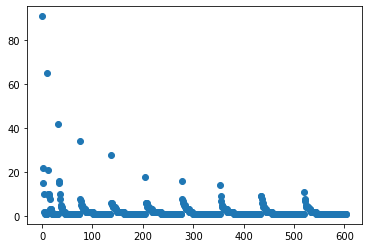

In [285]:
# I think the best way to do this is a scatter plot with time on the x-axis, count on the y-axis, and color according to combo

plt.scatter(combo_trends.index, combo_trends['count'])
plt.show()

In [286]:
# this chart is OK, in that it shows increasing diversity of combinations over time, but it doesn't show which ones are more common
# to get the colors to change according to the combo category I found this on stackoverflow: https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

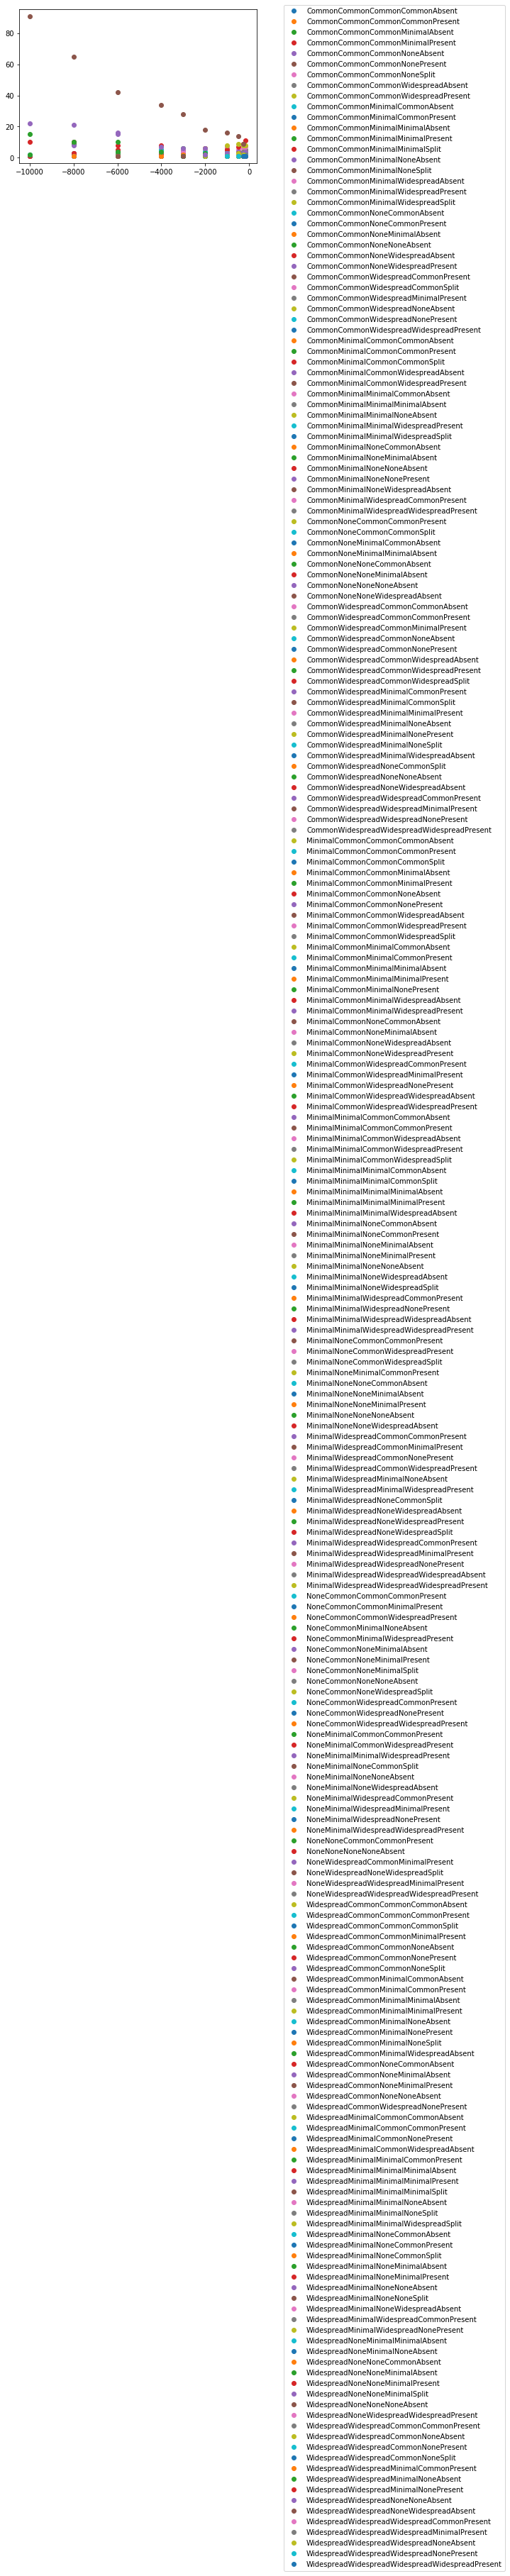

In [287]:
groups = combo_trends.groupby('prevalence')
for combo, group in groups:
    plt.plot(group['timeslice'], group['count'], marker="o", linestyle="", label=combo)
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [289]:
# This is better, but ultimately unintelligible because there are too many categories and the colors overlap - 
# it really only tells one story, that the 'foraging only' combination decreases dramatically over time
# so, let's go back to the beginning and make some rules for assigning fewer, but more relevant combinations categories

In [290]:
cadf = combo_all.to_frame(name='combo')
cadf = cadf.reset_index()

In [291]:
cadf

,region,timeslice,combo
0,1,-10000,WidespreadNoneNoneNoneAbsent
1,1,-8000,WidespreadNoneNoneNoneAbsent
2,1,-6000,WidespreadNoneNoneNoneAbsent
3,1,-4000,WidespreadNoneNoneNoneAbsent
4,1,-3000,WidespreadNoneNoneNoneAbsent
...,...,...,...
1455,146,-2000,NoneNoneNoneNoneAbsent
1456,146,-1000,WidespreadCommonCommonNoneAbsent
1457,146,-500,WidespreadWidespreadWidespreadNoneAbsent
1458,146,-250,WidespreadWidespreadWidespreadNoneAbsent


In [303]:
len(cadf.combo.unique())

241

In [306]:
# there are 241 different combinations, which I want to distill to descriptive categories
# to reduce the possibilities, I'll simply treat the prevalence levels as binaries

In [320]:
ar2['present_or_absent'] = ar2['prevalence']
ar2['present_or_absent'].replace({"Widespread": "Y", "Common": "N", "Minimal": "N", "None": "N", "Split": "N", "Present":"Y", "Absent": "N"}, inplace=True)

In [321]:
ar2.head(10)

,region,name,landuse,prevalence,timeslice,present_or_absent
0,1,Alaska,FHG,Widespread,-10000,Y
1,2,Yukon Territory,FHG,Widespread,-10000,Y
2,3,Northwest Territories,FHG,None,-10000,N
3,4,Nunavut,FHG,None,-10000,N
4,5,British Columbia,FHG,Widespread,-10000,Y
5,6,Alberta,FHG,Widespread,-10000,Y
6,7,Saskatchewan,FHG,Widespread,-10000,Y
7,8,Manitoba,FHG,Common,-10000,N
8,9,Ontario,FHG,Widespread,-10000,Y
9,10,Quebec,FHG,Widespread,-10000,Y


In [324]:
combo2 = ar2.groupby([ar2['region'], ar2['timeslice']])['present_or_absent'].sum()
combo2 = combo2.to_frame(name='combo')
combo2 = combo2.reset_index()

In [325]:
combo2

,region,timeslice,combo
0,1,-10000,YNNNN
1,1,-8000,YNNNN
2,1,-6000,YNNNN
3,1,-4000,YNNNN
4,1,-3000,YNNNN
...,...,...,...
1455,146,-2000,NNNNN
1456,146,-1000,YNNNN
1457,146,-500,YYYNN
1458,146,-250,YYYNN


In [326]:
combo2.combo.unique()

array(['YNNNN', 'NNNNN', 'YNNNY', 'YNNYN', 'NNNNY', 'YNYNY', 'YNYYY',
       'NNYYY', 'NNYNN', 'NNNYY', 'NNNYN', 'YYYNY', 'NNYNY', 'YYNNN',
       'YYNNY', 'NYNNY', 'NYYNY', 'NYYYY', 'NYNNN', 'NYNYY', 'NYNYN',
       'NYYYN', 'YYNYN', 'NNYYN', 'YYYYY', 'YYYNN'], dtype=object)

In [327]:
# that's still a lot of combinations, so let's also combine the agriculture types

In [339]:
di = dict.fromkeys(combo2.combo.unique())

In [373]:
di = {'YNNNN': 'Foraging',
 'NNNNN': 'No Human Presence',
 'YNNNY': "Foraging Urbanism",
 'YNNYN': "Foraging Pastoralism",
 'NNNNY': "Urbanism",
 'YNYNY': "Foraging Agriculture Urbanism",
 'YNYYY': "Mixed Urbanism",
 'NNYYY': "Agropastoralism Urbanism",
 'NNYNN': "Agriculture",
 'NNNYY': "Pastoralism Urbanism",
 'NNNYN': "Pastoralism",
 'YYYNY': "Foraging Agriculture Urbanism",
 'NNYNY': "Agriculture Urbanism",
 'YYNNN': "Foraging Agriculture",
 'YYNNY': "Foraging Agriculture",
 'NYNNY': "Agriculture Urbanism",
 'NYYNY': "Agriculture Urbanism",
 'NYYYY': "Agropastoralism Urbanism",
 'NYNNN': "Agriculture",
 'NYNYY': "Agropastoralism Urbanism",
 'NYNYN': "Agropastoralism",
 'NYYYN': "Agropastoralism",
 'YYNYN': "Mixed",
 'NNYYN': "Agropastoralism",
 'YYYYY': "Mixed Urbanism",
 'YYYNN': "Foraging Agriculture"}

In [374]:
combo2.combo.replace(di, inplace=True)

In [377]:
combo2

,region,timeslice,combo,category
0,1,-10000,Foraging,
1,1,-8000,Foraging,
2,1,-6000,Foraging,
3,1,-4000,Foraging,
4,1,-3000,Foraging,
...,...,...,...,...
1455,146,-2000,No Human Presence,
1456,146,-1000,Foraging,
1457,146,-500,Foraging Agriculture,
1458,146,-250,Foraging Agriculture,


In [378]:
len(combo2.combo.unique())

16

In [370]:
# OK, that gives us 16 categories, which is a little more reasonable to chart

In [379]:
combo2_trends = combo2.groupby('timeslice')['combo'].value_counts()
cm = combo2_trends.to_frame(name='count')
cm = cm.reset_index()
cm

,timeslice,combo,count
0,-10000,Foraging,97
1,-10000,No Human Presence,49
2,-8000,Foraging,88
3,-8000,No Human Presence,57
4,-8000,Pastoralism,1
...,...,...,...
94,-150,Mixed Urbanism,2
95,-150,Pastoralism,2
96,-150,Foraging Agriculture,1
97,-150,Foraging Pastoralism,1


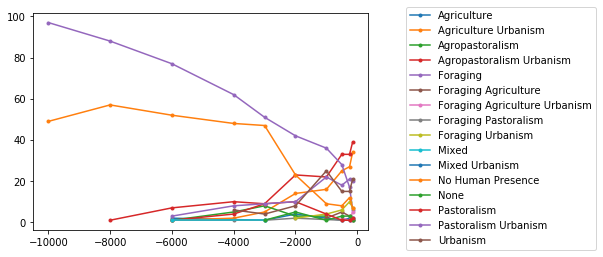

In [389]:
groups = cm.groupby('combo')
for combo, group in groups:
    plt.plot(group['timeslice'], group['count'], marker=".", linestyle="-", label=combo)
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [371]:
# That's a little more interesting, but I wonder if it might look better as a stacked plot

In [ ]:
# so first let's pivot the dataframe

In [387]:
cmp = cm.pivot(index='timeslice', columns='combo')['count']

In [409]:
cmp.fillna(0, inplace=True)
cmp

combo,Agriculture,Agriculture Urbanism,Agropastoralism,Agropastoralism Urbanism,Foraging,Foraging Agriculture,Foraging Agriculture Urbanism,Foraging Pastoralism,Foraging Urbanism,Mixed,Mixed Urbanism,No Human Presence,None,Pastoralism,Pastoralism Urbanism,Urbanism
timeslice,,,,,,,,,,,,,,,,
-10000,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0
-8000,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,1.0,0.0,0.0
-6000,2.0,1.0,1.0,1.0,77.0,0.0,0.0,1.0,0.0,1.0,0.0,52.0,0.0,7.0,3.0,0.0
-4000,0.0,2.0,5.0,4.0,62.0,0.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0,10.0,8.0,6.0
-3000,1.0,5.0,8.0,9.0,51.0,0.0,0.0,1.0,0.0,1.0,0.0,47.0,1.0,9.0,9.0,4.0
-2000,4.0,14.0,3.0,23.0,42.0,0.0,0.0,2.0,2.0,0.0,0.0,23.0,5.0,10.0,10.0,8.0
-1000,2.0,16.0,3.0,22.0,36.0,2.0,0.0,0.0,4.0,0.0,0.0,9.0,1.0,4.0,22.0,25.0
-500,1.0,25.0,0.0,33.0,28.0,5.0,2.0,1.0,6.0,0.0,0.0,8.0,3.0,1.0,18.0,15.0
-250,2.0,27.0,0.0,33.0,17.0,3.0,1.0,0.0,10.0,0.0,1.0,12.0,3.0,1.0,21.0,15.0


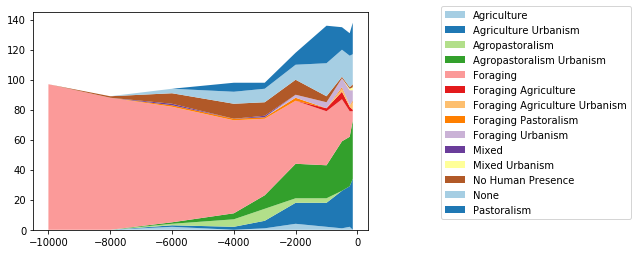

In [415]:
labels = cmp.columns
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']
plt.stackplot(cmp.index, cmp['Agriculture'], cmp['Agriculture Urbanism'], cmp['Agropastoralism'],
             cmp['Agropastoralism Urbanism'], cmp['Foraging'], cmp['Foraging Agriculture'], cmp['Foraging Agriculture Urbanism'],
             cmp['Foraging Pastoralism'], cmp['Foraging Urbanism'], cmp['Mixed'], cmp['Mixed Urbanism'], cmp['Pastoralism'],
              cmp['Pastoralism Urbanism'], cmp['Urbanism'], baseline='zero', labels=labels, colors=colors)
plt.legend(bbox_to_anchor=(1.8, 1.05))
plt.show()

In [421]:
# not bad, but the foraging category is drowning out the others a bit, so let's see what it looks like without that and the 'no human presence' category

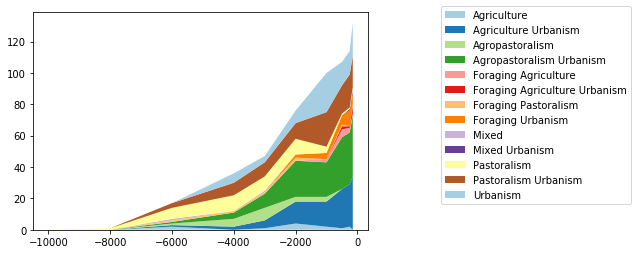

In [422]:
labels = ['Agriculture', 'Agriculture Urbanism', 'Agropastoralism',
       'Agropastoralism Urbanism', 'Foraging Agriculture',
       'Foraging Agriculture Urbanism', 'Foraging Pastoralism',
       'Foraging Urbanism', 'Mixed', 'Mixed Urbanism', 'Pastoralism', 'Pastoralism Urbanism', 'Urbanism']
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']
plt.stackplot(cmp.index, cmp['Agriculture'], cmp['Agriculture Urbanism'], cmp['Agropastoralism'],
             cmp['Agropastoralism Urbanism'], cmp['Foraging Agriculture'], cmp['Foraging Agriculture Urbanism'],
             cmp['Foraging Pastoralism'], cmp['Foraging Urbanism'], cmp['Mixed'], cmp['Mixed Urbanism'], cmp['Pastoralism'],
              cmp['Pastoralism Urbanism'], cmp['Urbanism'], baseline='zero', labels=labels, colors=colors)
plt.legend(bbox_to_anchor=(1.8, 1.05))
plt.show()

In [423]:
# Much better, now we can see some real trends of how these landuses combine within regions over time
# Foraging in combination with other landuses is never very common
# Pastoralism on its own, with and without urbanism, is fairly common from around 8,000 years ago
# Most of the landuse combinations without urbansim decline precipitously around 2,000 years ago, except for Agriculture - which increases at that time
# There's never very much of the 'mixed' categories - suggesting foraging, agriculture, and pastoralism all together are rarely found in the same regions
# The agriculture on its own categories and the agropastoral categories have very similar trends
# 3,000 years ago seems to be an inflection point for agriculture and urbanism - both accelerating

In [425]:
# Now, let's try to see these combinations and trends on a map - I'm going to be following this tutorial: https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

In [432]:
# I'll be working with the ArchaeGLOBE regions shapefile to make my maps

In [440]:
import GeoPandas as gpd

ModuleNotFoundError: No module named 'GeoPandas'

In [442]:
# well, this didn't work out, I wasn't able to install geopandas and couldn't figure out another way to map custom shapefiles
# I'll have to come back to the mapping at a later date
# For now, I'll work on some other problems instead

In [476]:
# let's set some percentage values to our prevalence levels and apply them to land areas for our regions
ar2.head(10)

,region,name,landuse,prevalence,timeslice,present_or_absent,area
0,1,Alaska,FHG,Widespread,-10000,Y,None
1,2,Yukon Territory,FHG,Widespread,-10000,Y,None
2,3,Northwest Territories,FHG,None,-10000,N,None
3,4,Nunavut,FHG,None,-10000,N,None
4,5,British Columbia,FHG,Widespread,-10000,Y,None
5,6,Alberta,FHG,Widespread,-10000,Y,None
6,7,Saskatchewan,FHG,Widespread,-10000,Y,None
7,8,Manitoba,FHG,Common,-10000,N,None
8,9,Ontario,FHG,Widespread,-10000,Y,None
9,10,Quebec,FHG,Widespread,-10000,Y,None


In [480]:
# let's create a new column for the percent area and a method to populate it from the prevalence level

In [482]:
per = {'Widespread': .2, 'Common': .1, 'Minimal': .01, 'None': 0, 'Absent': 0, 'Present': 0, 'Split': 0}
ar2['percent_land_used'] = ar2.prevalence.apply(lambda x: per[x])

In [483]:
ar2.head()

,region,name,landuse,prevalence,timeslice,present_or_absent,area,percent_land_used
0,1,Alaska,FHG,Widespread,-10000,Y,None,0.2
1,2,Yukon Territory,FHG,Widespread,-10000,Y,None,0.2
2,3,Northwest Territories,FHG,None,-10000,N,None,0.0
3,4,Nunavut,FHG,None,-10000,N,None,0.0
4,5,British Columbia,FHG,Widespread,-10000,Y,None,0.2


In [477]:
# to get areas for regions we'll have to get the data from a new source, first let's read our shapefile
import shapefile as shp

In [458]:
sf = shp.Reader("ArchaeoGLOBE_Simplified_Regions")

In [478]:
# now let's take a look at the fields in the shapefile
region_data = sf.records()
region_data

[Record #0: [1, 'Northern North America and Greenland', 1, 'Alaska', 1499260.0, 1492600.0],
 Record #1: [1, 'Northern North America and Greenland', 2, 'Yukon Territory', 482548.0, 482179.0],
 Record #2: [1, 'Northern North America and Greenland', 3, 'Northwest Territories', 1342540.0, 1277000.0],
 Record #3: [1, 'Northern North America and Greenland', 4, 'Nunavut', 2069700.0, 2056380.0],
 Record #4: [1, 'Northern North America and Greenland', 5, 'British Columbia', 943566.0, 940882.0],
 Record #5: [1, 'Northern North America and Greenland', 6, 'Alberta', 662254.0, 658381.0],
 Record #6: [1, 'Northern North America and Greenland', 7, 'Saskatchewan', 649508.0, 636873.0],
 Record #7: [1, 'Northern North America and Greenland', 8, 'Manitoba', 651154.0, 619006.0],
 Record #8: [1, 'Northern North America and Greenland', 9, 'Ontario', 1076370.0, 1056950.0],
 Record #9: [1, 'Northern North America and Greenland', 10, 'Quebec', 1502790.0, 1483800.0],
 Record #10: [1, 'Northern North America and

In [490]:
# now let's create a dictionary to store the data we care about - the area of the region
region_areas = {}
keys = range(1, 147)
for n in keys:
    region_areas[n] = region_data[n-1][5]

In [491]:
 region_areas

{1: 1492600.0,
 2: 482179.0,
 3: 1277000.0,
 4: 2056380.0,
 5: 940882.0,
 6: 658381.0,
 7: 636873.0,
 8: 619006.0,
 9: 1056950.0,
 10: 1483800.0,
 11: 133169.0,
 12: 395760.0,
 13: 2142680.0,
 14: 1120790.0,
 15: 1096830.0,
 16: 846666.0,
 17: 794423.0,
 18: 1185820.0,
 19: 443885.0,
 20: 868471.0,
 21: 1433010.0,
 22: 1048770.0,
 23: 677036.0,
 24: 389878.0,
 25: 359579.0,
 26: 231578.0,
 27: 918393.0,
 28: 768515.0,
 29: 1049390.0,
 30: 5346300.0,
 31: 3766690.0,
 32: 1237530.0,
 33: 1230250.0,
 34: 1192420.0,
 35: 1100860.0,
 36: 1170100.0,
 37: 101950.0,
 38: 314130.0,
 39: 856497.0,
 40: 499714.0,
 41: 591448.0,
 42: 539909.0,
 43: 549742.0,
 44: 728392.0,
 45: 545385.0,
 46: 207095.0,
 47: 596576.0,
 48: 398437.0,
 49: 1613830.0,
 50: 593061.0,
 51: 588204.0,
 52: 1096020.0,
 53: 1727770.0,
 54: 5053980.0,
 55: 6129850.0,
 56: 756994.0,
 57: 184232.0,
 58: 322170.0,
 59: 452189.0,
 60: 225704.0,
 61: 442183.0,
 62: 954984.0,
 63: 1942210.0,
 64: 839898.0,
 65: 692180.0,
 66: 3253

In [484]:
# now let's set our area column

In [492]:
ar2['area'] = ar2.region.apply(lambda x: region_areas[x])

In [493]:
ar2.head()

,region,name,landuse,prevalence,timeslice,present_or_absent,area,percent_land_used
0,1,Alaska,FHG,Widespread,-10000,Y,1492600.0,0.2
1,2,Yukon Territory,FHG,Widespread,-10000,Y,482179.0,0.2
2,3,Northwest Territories,FHG,None,-10000,N,1277000.0,0.0
3,4,Nunavut,FHG,None,-10000,N,2056380.0,0.0
4,5,British Columbia,FHG,Widespread,-10000,Y,940882.0,0.2


In [494]:
# now let's find the area used by multiplying the area and the percent land used

In [495]:
ar2['land_area_used'] = ar2['area']*ar2['percent_land_used']

In [496]:
ar2.head()

,region,name,landuse,prevalence,timeslice,present_or_absent,area,percent_land_used,land_area_used
0,1,Alaska,FHG,Widespread,-10000,Y,1492600.0,0.2,298520.0
1,2,Yukon Territory,FHG,Widespread,-10000,Y,482179.0,0.2,96435.8
2,3,Northwest Territories,FHG,None,-10000,N,1277000.0,0.0,0.0
3,4,Nunavut,FHG,None,-10000,N,2056380.0,0.0,0.0
4,5,British Columbia,FHG,Widespread,-10000,Y,940882.0,0.2,188176.4


In [497]:
land = ar2.groupby([ar2['region'], ar2['timeslice']])['land_area_used'].sum()

In [498]:
land

region  timeslice
1       -10000       298520.00
        -8000        298520.00
        -6000        298520.00
        -4000        298520.00
        -3000        298520.00
                       ...    
146     -2000             0.00
        -1000          6776.12
        -500          10164.18
        -250          10164.18
        -150          11858.21
Name: land_area_used, Length: 1460, dtype: float64

In [501]:
land.max()

3537786.0

In [502]:
land.min()

0.0

In [507]:
land_trend = ar2.groupby('timeslice')['land_area_used'].sum()

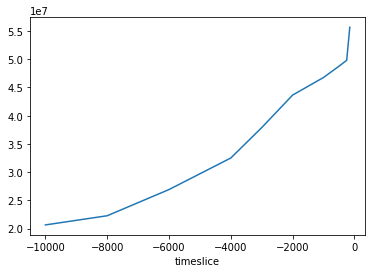

In [508]:
land_trend.plot()